<a href="https://colab.research.google.com/github/dbright123/Dbot-Advance/blob/main/lstm_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import MetaTrader5 as mt5
import numpy as np
import pandas as pd





In [2]:
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)

trade_active = mt5.initialize()

print(trade_active)

if not trade_active:
    print('Initialization failed, check internet connection. You must have Meta Trader 5 installed.')
    mt5.shutdown()

else:
    print(mt5.account_info()._asdict())
    print("\n")
    print(mt5.terminal_info()._asdict())
    print("\n")
    print(mt5.symbols_total())

MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.4200
True
{'login': 63134054, 'trade_mode': 2, 'leverage': 100, 'limit_orders': 500, 'margin_so_mode': 0, 'trade_allowed': True, 'trade_expert': True, 'margin_mode': 2, 'currency_digits': 2, 'fifo_close': False, 'balance': 57.46, 'credit': 13.06, 'profit': 0.0, 'equity': 70.52, 'margin': 0.0, 'margin_free': 70.52, 'margin_level': 0.0, 'margin_so_call': 25.0, 'margin_so_so': 15.0, 'margin_initial': 0.0, 'margin_maintenance': 0.0, 'assets': 0.0, 'liabilities': 0.0, 'commission_blocked': 0.0, 'name': 'Bright Idowu ', 'server': 'OctaFX-Real', 'currency': 'USD', 'company': 'Octa Markets Incorporated'}


{'community_account': False, 'community_connection': False, 'connected': True, 'dlls_allowed': False, 'trade_allowed': False, 'tradeapi_disabled': False, 'email_enabled': False, 'ftp_enabled': False, 'notifications_enabled': False, 'mqid': True, 'build': 5370, 'maxbars': 100000000, 'codepage': 0, 'ping_last': 1988

In [3]:
account = mt5.account_info()
terminal = mt5.terminal_info()

print(account.equity)

if(terminal.connected == True or terminal.trade_allowed == True):
    print("AI is successfully functional")
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")

70.52
AI is successfully functional


In [4]:
t_s = "GBPUSD"
market = mt5.copy_rates_from_pos(t_s, mt5.TIMEFRAME_M15, 0, 10000000)
#display(market)
print(market.shape)

print(t_s)




(666341,)
GBPUSD


In [7]:
market

array([( 737164800, 1.537  , 1.5445 , 1.529  , 1.5338 , 2781, 50, 0),
       ( 737251200, 1.5328 , 1.536  , 1.518  , 1.5225 , 2571, 50, 0),
       ( 737337600, 1.5228 , 1.5415 , 1.52   , 1.5387 , 2711, 50, 0), ...,
       (1762557300, 1.31634, 1.31646, 1.31587, 1.31601,  636, 14, 0),
       (1762558200, 1.31602, 1.31604, 1.31543, 1.31545,  419, 14, 0),
       (1762559100, 1.31543, 1.31626, 1.31523, 1.31573, 2185, 14, 0)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])

In [8]:
data = []
for i in range(len(market)):
    data.append([market[i][1],market[i][2],market[i][3],market[i][4],market[i][5]])
df = pd.DataFrame(data, columns=["open", "high","low", "close","volume"])
df.to_csv("Generated"+t_s+" dbot.csv", index=False)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
print(tf.__version__)


2025-11-08 13:44:05.090314: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-08 13:44:05.546388: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-08 13:44:07.418435: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


2.20.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
import os
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scaler3d2d import preprocess_and_save_scalers,transform_data, inverse_transform_data,create_sequences



In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt



from tensorflow.keras import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, LayerNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
import keras

In [ ]:
t_symbol = ["GBPUSD"]

In [ ]:


def engineer_features_5min_btc(df):
    """
    Input: df with columns ['timestamp', 'open', 'high', 'low', 'close', 'volume']
    Output: df with 68 features
    """

    # GROUP 1: Core Price Features
    df['typical_price'] = (df['high'] + df['low'] + df['close']) / 3

    # GROUP 7: Support/Resistance Features
    df['pivot_point'] = (df['high'].shift(1) + df['low'].shift(1) + df['close'].shift(1)) / 3

    return df

# Usage:
# df = pd.read_csv('btcusd_5min.csv')
# df = engineer_features_5min_btc(df)

In [ ]:
n = 0
m_label = "Generated"+t_symbol[n]
#pd.set_option('display.float_format', '{:.20f}'.format)

train_df = pd.read_csv(m_label+ " dbot.csv")
max_val = train_df.max()
print(max_val)
train_df = train_df/max_val
#train_df = engineer_features_5min_btc(train_df)[10:]

open          2.1142
high          2.1161
low           2.1129
close         2.1144
volume    98524.0000
dtype: float64


In [ ]:
train_df

,open,high,low,close,volume
0,0.726989,0.729880,0.723650,0.725407,0.028227
1,0.725002,0.725864,0.718444,0.720062,0.026095
2,0.720272,0.728463,0.719390,0.727724,0.027516
3,0.726752,0.730589,0.724549,0.726211,0.029648
4,0.726043,0.726809,0.721142,0.726684,0.027516
...,...,...,...,...,...
666336,0.622623,0.622116,0.622940,0.622526,0.012840
666337,0.622585,0.622059,0.622869,0.622560,0.006526
666338,0.622618,0.622116,0.622779,0.622404,0.006455
666339,0.622467,0.621918,0.622571,0.622139,0.004253


In [ ]:

#train_df_test = train_dfs_test[n]
print(m_label)
SEQ_LEN = 240 # length of input sequence (timesteps). Typical choices: 30, 60, 90
n_rows, n_features = train_df.values.shape


X, y = create_sequences(train_df.values, SEQ_LEN, 3, 0 )
train_df = None
n_samples = X.shape[0]
#print(X[-1])
print(y[-1])

GeneratedGBPUSD
[0.62261848 0.62246713 0.62218806]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=False)
X_val, X_test, y_val,  y_test = train_test_split(X_test, y_test, test_size=0.01, random_state=0, shuffle=False)
X = None
y = None

In [ ]:

seq_len = X_train.shape[1]
n_features = X_train.shape[2]
output_dim = y_train.shape[1]

i = Input(shape=(seq_len, n_features))

X = Bidirectional(LSTM(64, return_sequences=True))(i)
X = Bidirectional(LSTM(64, return_sequences=True))(X)
X = Bidirectional(LSTM(64, return_sequences=True))(X)
X = Bidirectional(LSTM(64, return_sequences=True))(X)
#X = Dropout(0.3)(X)
#X = BatchNormalization()(X)
X = Bidirectional(LSTM(32))(X)
X = Dropout(0.3)(X)

X = Dense(32, activation="relu")(X)
X = Dropout(0.3)(X)

X = Dense(output_dim)(X)

model = Model(i, X)
model.summary()


I0000 00:00:1762605861.904600   27398 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5561 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 5)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 240, 128)       │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 240, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 240, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 240, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 375,683 (1.43 MB)

 Trainable params: 375,683 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

es = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=2)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-6, verbose=2)
mc = ModelCheckpoint(m_label + 'lstm_best.keras', monitor='val_loss', save_best_only=True, verbose=2)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae',tf.keras.metrics.RootMeanSquaredError(),'mape','msle'])
r = model.fit(
  X_train, y_train,
  validation_data=(X_val, y_val),
  epochs=100,
  batch_size=256,
  callbacks=[es, rlr, mc ],
  verbose=1

)

Epoch 1/100


2025-11-08 13:44:30.505503: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400


1744/1744 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.0294 - mae: 0.1220 - mape: 15.7210 - msle: 0.0109 - root_mean_squared_error: 0.1629
Epoch 1: val_loss improved from None to 0.00016, saving model to GeneratedGBPUSDlstm_best.keras
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 311s 175ms/step - loss: 0.0127 - mae: 0.0772 - mape: 9.9064 - msle: 0.0044 - root_mean_squared_error: 0.1125 - val_loss: 1.6358e-04 - val_mae: 0.0087 - val_mape: 1.4809 - val_msle: 6.5371e-05 - val_root_mean_squared_error: 0.0128 - learning_rate: 0.0010
Epoch 2/100
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 9.3402e-04 - mae: 0.0222 - mape: 2.7996 - msle: 2.8331e-04 - root_mean_squared_error: 0.0303
Epoch 2: val_loss improved from 0.00016 to 0.00009, saving model to GeneratedGBPUSDlstm_best.keras
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 302s 173ms/step - loss: 6.3947e-04 - mae: 0.0178 - mape: 2.2508 - msle: 1.9363e-04 - root_mean_squared_error: 0.0253 - val_loss: 9.0266e-05 - val_mae: 0.0092 - val_mape: 1.5013 - val_msle: 3.4

KeyboardInterrupt: 

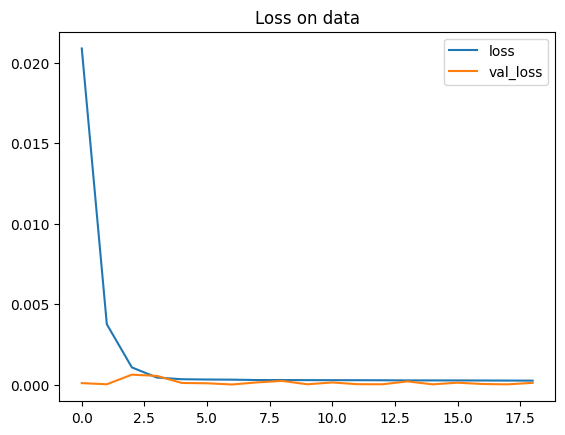

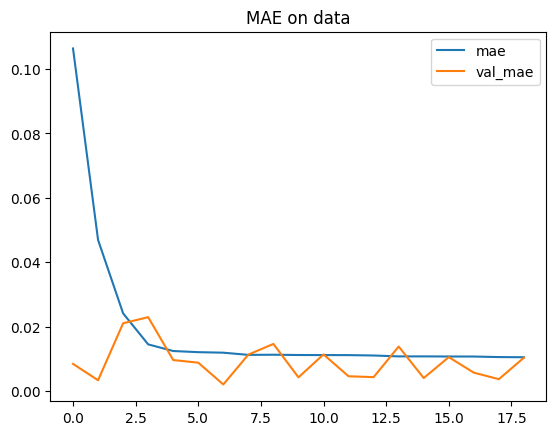

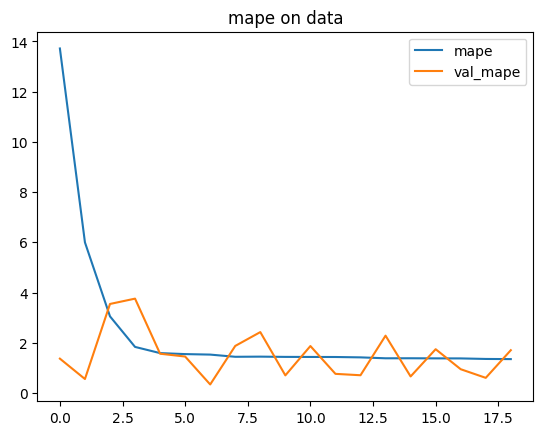

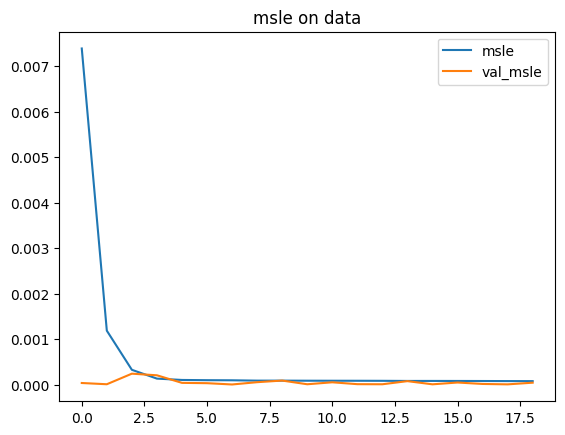

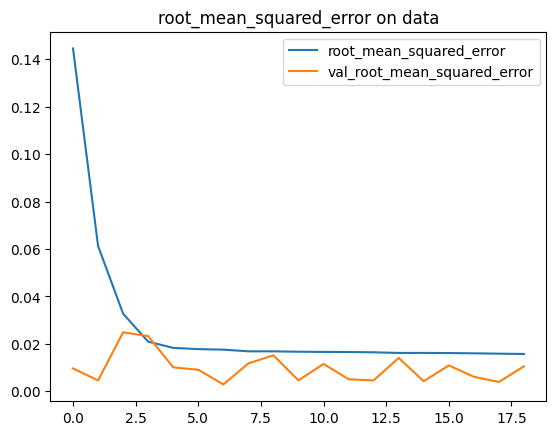

In [ ]:
plt.title("Loss on data")
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

plt.title("MAE on data")
plt.plot(r.history['mae'], label="mae")
plt.plot(r.history['val_mae'], label="val_mae")
plt.legend()
plt.show()

plt.title("mape on data")
plt.plot(r.history['mape'], label="mape")
plt.plot(r.history['val_mape'], label="val_mape")
plt.legend()
plt.show()

plt.title("msle on data")
plt.plot(r.history['msle'], label="msle")
plt.plot(r.history['val_msle'], label="val_msle")
plt.legend()
plt.show()

plt.title("root_mean_squared_error on data")
plt.plot(r.history['root_mean_squared_error'], label="root_mean_squared_error")
plt.plot(r.history['val_root_mean_squared_error'], label="val_root_mean_squared_error")
plt.legend()
plt.show()




In [ ]:
m_label = "GeneratedGBPUSD"
best_model = load_model(m_label + 'lstm_best.keras')

In [ ]:
best_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 90, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 90, 128)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 90, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 90, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 90, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,127,051 (4.30 MB)

 Trainable params: 375,683 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 751,368 (2.87 MB)

In [ ]:
y_pred = best_model.predict(X_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


In [ ]:
print(y_pred.shape)

(2199, 3)


In [ ]:
#_,y_test = inverse_transform_data(scaled_y=y_test)
#_,y_pred = inverse_transform_data(scaled_y=y_pred)
print(y_test, " comparing to ", y_pred)

[[0.63505818 0.63499196 0.63491628]
 [0.63499196 0.63491628 0.63491628]
 [0.63491628 0.63491628 0.63493047]
 ...
 [0.62262321 0.62258538 0.62261848]
 [0.62258538 0.62261848 0.62246713]
 [0.62261848 0.62246713 0.62218806]]  comparing to  [[0.6363408  0.63501155 0.635275  ]
 [0.6363087  0.63497734 0.63524115]
 [0.63628656 0.6349535  0.6352176 ]
 ...
 [0.6226413  0.6209916  0.6213217 ]
 [0.6226386  0.6209893  0.6213194 ]
 [0.6226148  0.6209664  0.6212965 ]]


In [ ]:
# 1. Calculate the error (the gap between actual and predicted)
error = y_test - y_pred

# 2. Calculate the average gap (the bias)
average_gap = np.mean(error)
print(f"Average Gap (Bias): {average_gap:.7f}")

# 3. Add the average gap to your predictions to create a corrected version
y_pred_corrected = y_pred + average_gap

# --- Verification ---
# Let's check the first predicted value vs. the first actual value
print("\n--- Example of Correction ---")
print(f"Original Prediction: {y_pred[0, 0]:.7f}")
print(f"Corrected Prediction: {y_pred_corrected[0, 0]:.7f}")
print(f"Actual Value:        {y_test[0, 0]:.7f}")



Average Gap (Bias): 0.0001636

--- Example of Correction ---
Original Prediction: 0.6363408
Corrected Prediction: 0.6365044
Actual Value:        0.6350582


In [ ]:
print("R^2 value for ", m_label)
print(r2_score(y_test, y_pred))
print(r2_score(y_test, y_pred_corrected))

R^2 value for  GeneratedGBPUSD
0.9367408932543785
0.9375313974430189


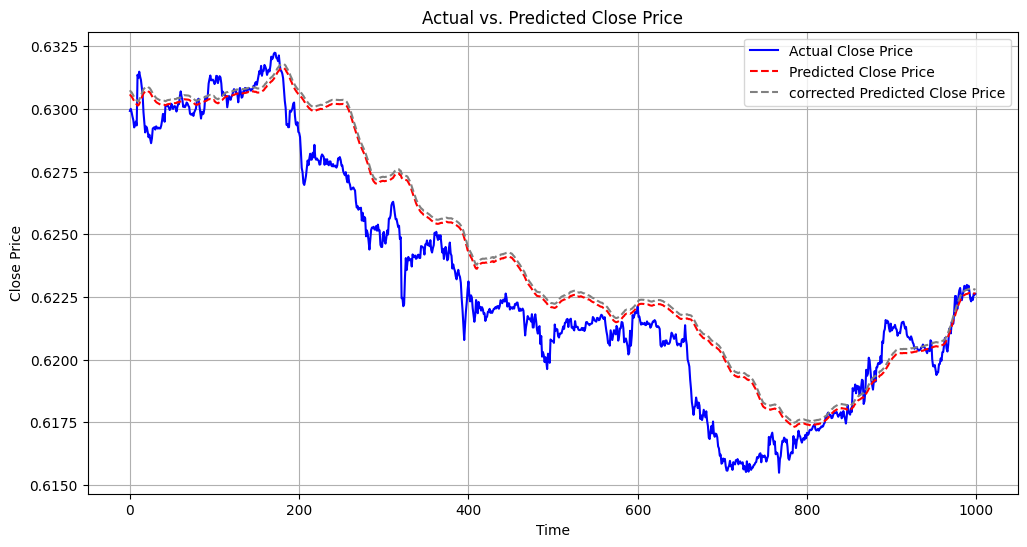

In [ ]:




plt.figure(figsize=(12, 6))
plt.plot(y_test[-1000:, 0], label='Actual Close Price', color='blue')
plt.plot(y_pred[-1000:, 0], label='Predicted Close Price', color='red', linestyle='--')
plt.plot(y_pred_corrected[-1000:, 0], label='corrected Predicted Close Price', color='gray', linestyle='--')
plt.title('Actual vs. Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()
